# Лабораторна робота №5
## з дисципліни "Чисельні методи"

##### За темою: "Інтерполяція і наближення функцій"

##### Виконав: студент групи КА-12 Гавлицький Іван

##### Перевірила: Димитрієва О. А.

##### *Мета роботи:* придбання практичних навичок в побудові наближених формул інтерполювання для одновимірних функцій, заданих на відрізку у вигляді таблиці. Визначення похибок інтерполяційних формул. Інтерполяція за допоогою сплайнів. Застосування практичних методів наближення функцій.

## Варіант 38

##### 1. Для заданої таблиці значень (n+1 точка) побудувати інтерполяційний багаточлен відповідного типу. Обчислити значення функції у середніх точках кожного відрізку. Об’єднати початкові значення і ті, що були обчислені додатково (2n+1 точка), побудувати інтерполяційний багаточлен більшого ступеня. Навести графіки отриманих функцій і початкові точки.

##### 2. За аналітично заданою функцією сформувати регулярну таблицю вузлів (бажано, щоб амплітуда інтервалу не перевищувала 1),наблизити отримані дані інтерполяційним поліномом. Визначити апріорну і апостеріорну похибки інтерполяції. Навести графіки функцій: початкової, інтерпольованої, розбіжностей.

##### 3. За даними з п.1 (2n+1 точка) виконати сплайн-інтерполяцію. Навести графіки функцій: інтерпольованої відповідним багаточленом, сплайн- інтерполяції, розбіжностей

##### 4. Провести наближення за даними з п.1 (2n+1 точка) методом найменших квадратів. Максимальні ступені наближення обрати самостійно. Навести графіки для порівняння.

<center> <img src=https://i.imgur.com/0zV3XFA.png> </center>
<center> <img src=https://i.imgur.com/bEVWyDm.png> </center>

In [33]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
import math

pnts1 = np.array([[.5, 1.5, 2, 2.5, 3],
                 [1, 2.75, 3, 3.5, 3.75]])

pnts1

array([[0.5 , 1.5 , 2.  , 2.5 , 3.  ],
       [1.  , 2.75, 3.  , 3.5 , 3.75]])

## Другий інтерполяційний багаточлен Ньютона

In [34]:
def newton_polynomial(pnts, type=1):
    x_smbl = smp.symbols('x')
    diffs = divided_diffs(pnts, type)

    return smp.expand(num_newton_polynomial(x_smbl, pnts[0], diffs, type))


def num_newton_polynomial(x, nodes, diffs, type=1):
    if type == 2:
        nodes = np.flip(nodes)

    output = 0
    for ii, diff in enumerate(diffs):
        output += np.prod(x - nodes[:ii]) * diff

    return output


def divided_diffs(pnts, type=1):
    if type == 2:
        pnts = np.flip(pnts, axis=1)
    
    n = pnts.shape[1]
    output = np.zeros((n, n))
    output[0] = pnts[1]

    for ii in range(1, n):
        dx_set = (np.roll(pnts[0], -ii) - pnts[0])
        output[ii] = (np.roll(output[ii - 1], -1) - output[ii - 1]) / dx_set

    return output[:, 0]
    

##### Побудуємо багаточлен для заданих 5 точок.

In [35]:
pol1 = newton_polynomial(pnts1, type=2)
pol1

-0.533333333333333*x**4 + 4.13333333333333*x**3 - 11.3666666666667*x**2 + 13.7166666666667*x - 3.5

##### Порівняємо із багаточленом, згенерованим вбудованною функцією.

In [36]:

x_smbl = smp.symbols('x')
s = smp.functions.special.bsplines.interpolating_spline(4, x_smbl, pnts1[0], pnts1[1])
s

Piecewise((-0.533333333333302*x**4 + 4.1333333333331*x**3 - 11.3666666666661*x**2 + 13.7166666666661*x - 3.49999999999984, (x >= 0.5) & (x <= 3.0)))

##### Побудуємо графік

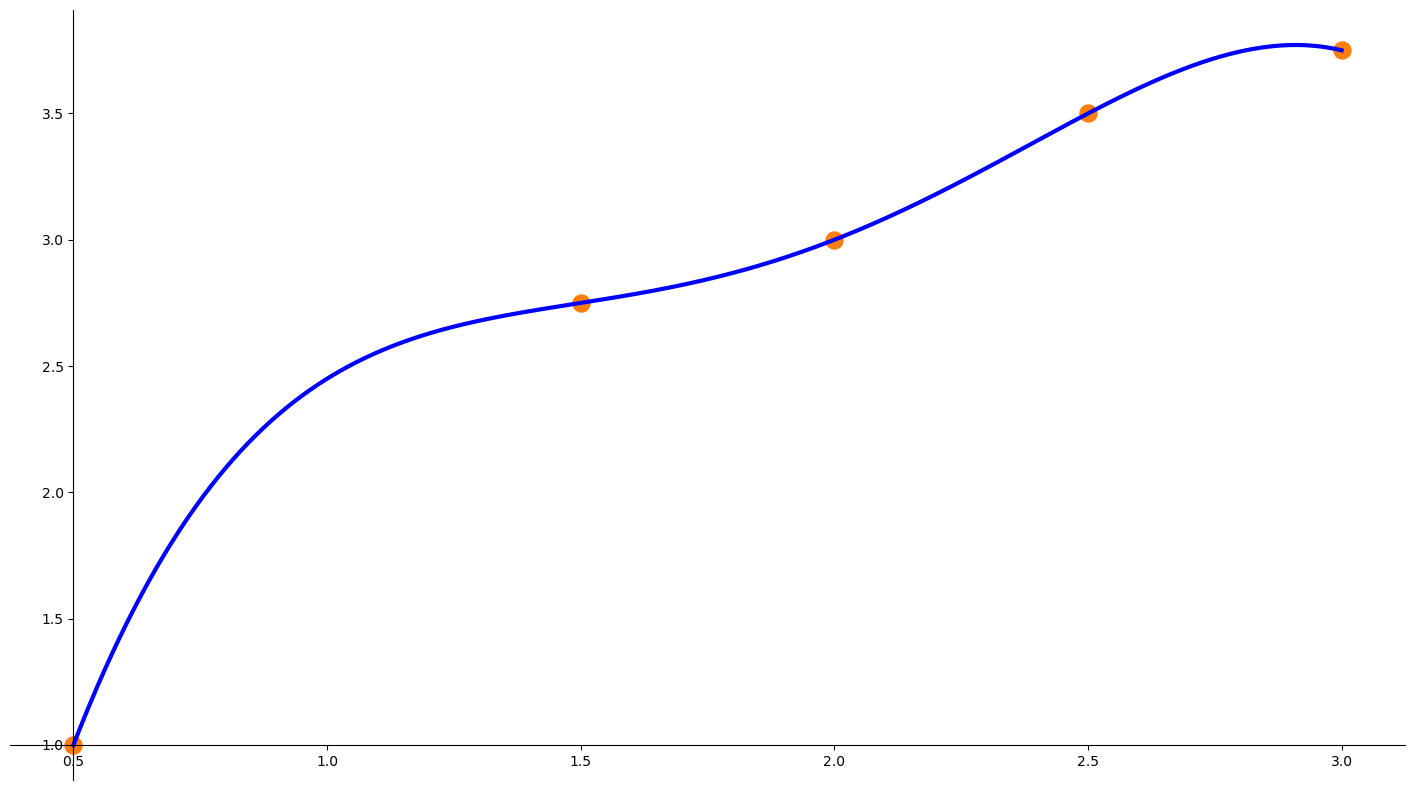

In [37]:
phi1 = np.vectorize(smp.lambdify(x_smbl, pol1))
x_set = np.linspace(pnts1[0, 0], pnts1[0, -1], 1000)

graph, ax = plt.subplots(1, 1, figsize  = (18, 10))

ax.plot(x_set, phi1(x_set), 'b', linewidth=3)
ax.scatter(pnts1[0], pnts1[1], s = 150, c='C1')

ax.spines['left'].set_position(('data', .5))
ax.spines['bottom'].set_position(('data', 1))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.show()


##### Обчислимо значення функції у середніх точках кожного відрізку

In [38]:
nodes1_new = (pnts1[0][1:] + pnts1[0][:-1])/2
pnts1_new = np.concatenate((pnts1, [nodes1_new, phi1(nodes1_new)]), axis = 1)
pnts1_new = pnts1_new[:, np.argsort(pnts1_new[0])]
print(pnts1_new)

[[0.5     1.      1.5     1.75    2.      2.25    2.5     2.75    3.     ]
 [1.      2.45    2.75    2.84375 3.      3.23125 3.5     3.71875 3.75   ]]


##### Згенеруємо багаточлен враховуючи додаткові точки

In [39]:
pol1_new = newton_polynomial(pnts1_new, type=2)
pol1_new

9.99211549480519e-12*x**8 - 1.5002499052587e-10*x**7 + 9.60162066891238e-10*x**6 - 3.40993413616708e-9*x**5 - 0.533333326014665*x**4 + 4.13333332366765*x**3 - 11.366666659056*x**2 + 13.7166666634373*x - 3.4999999994445

##### Бачимо, що багаточлен, не враховуючи похибок, збігається із попереднім.
##### Побудуємо графік

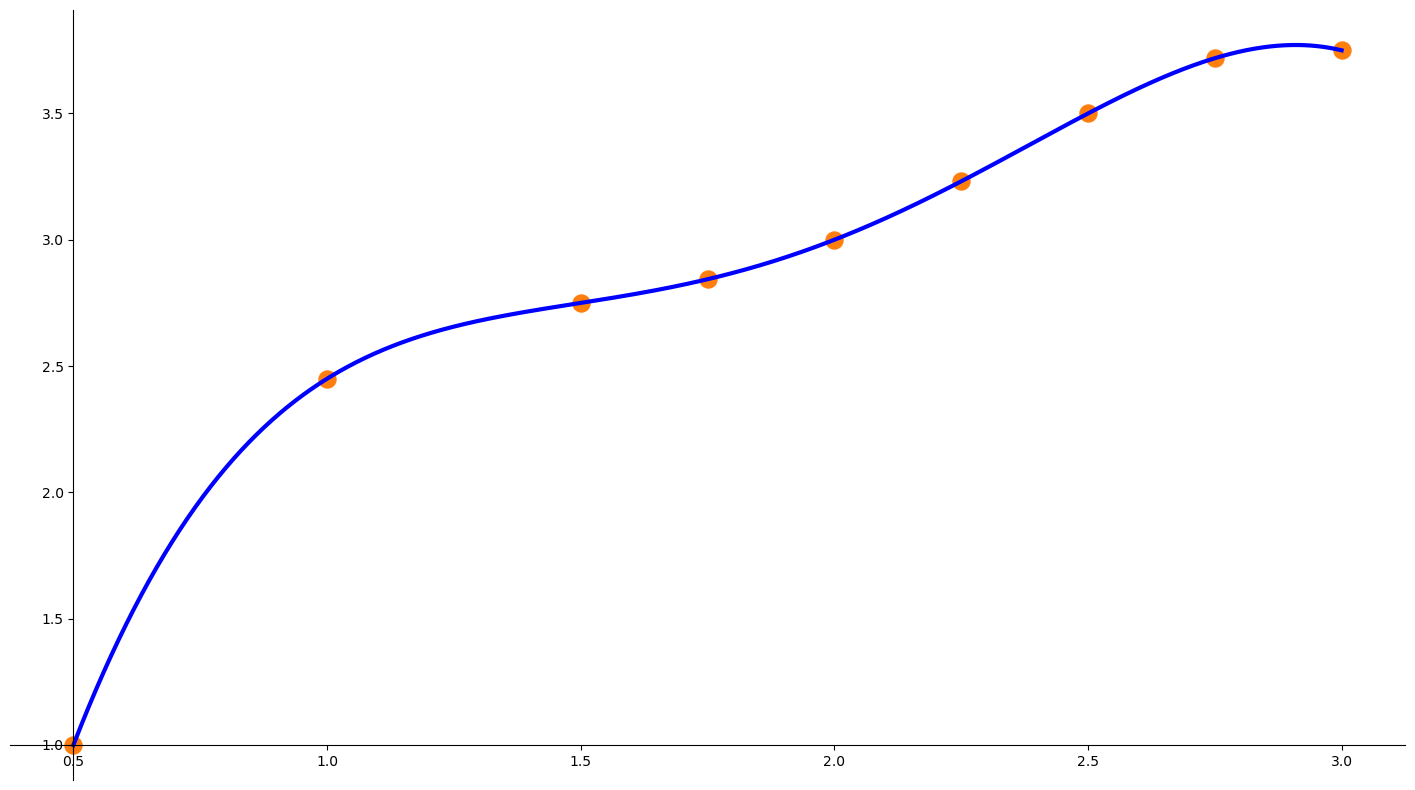

In [40]:
phi1_new = np.vectorize(smp.lambdify(x_smbl, pol1_new))

graph, ax = plt.subplots(1, 1, figsize  = (18, 10))

ax.plot(x_set, phi1_new(x_set), 'b', linewidth=3)
ax.scatter(pnts1_new[0], pnts1_new[1], s = 150, c='C1')

ax.spines['left'].set_position(('data', .5))
ax.spines['bottom'].set_position(('data', 1))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.show()

## Визначимо похибки інтерполяції для заданної функції $f(x)$

In [41]:
def func(x):
    return 3*x * smp.log(2*x + .5) - 10

##### Побудуємо графік аби обрати проміжок для інтерполяції

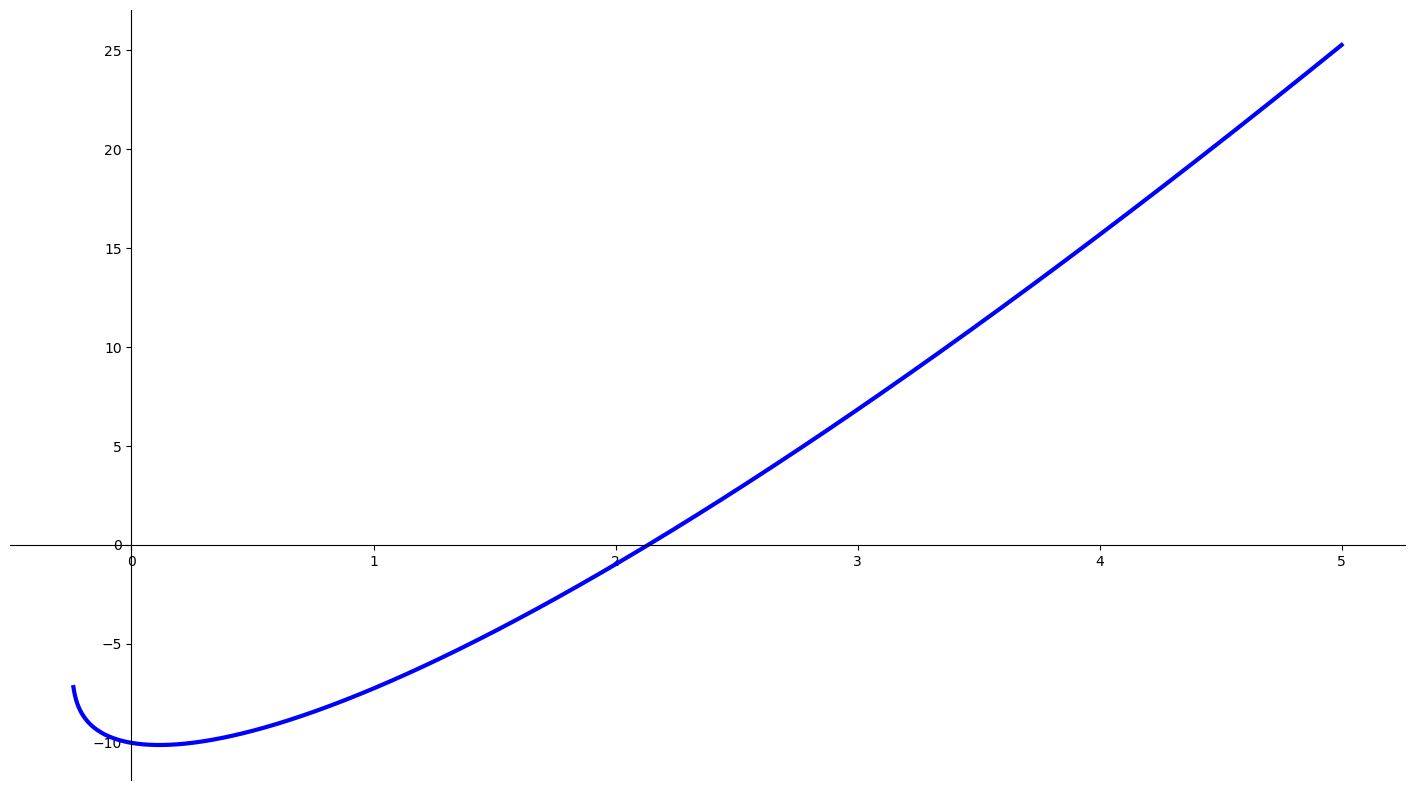

In [42]:
vec_func = np.vectorize(func)
x_set = np.linspace(-.24, 5, 1000)

graph, ax = plt.subplots(1, 1, figsize  = (18, 10))
ax.plot(x_set, vec_func(x_set), 'b', linewidth=3)

ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.show()

##### Нехай проміжок $ = [0, 3]$

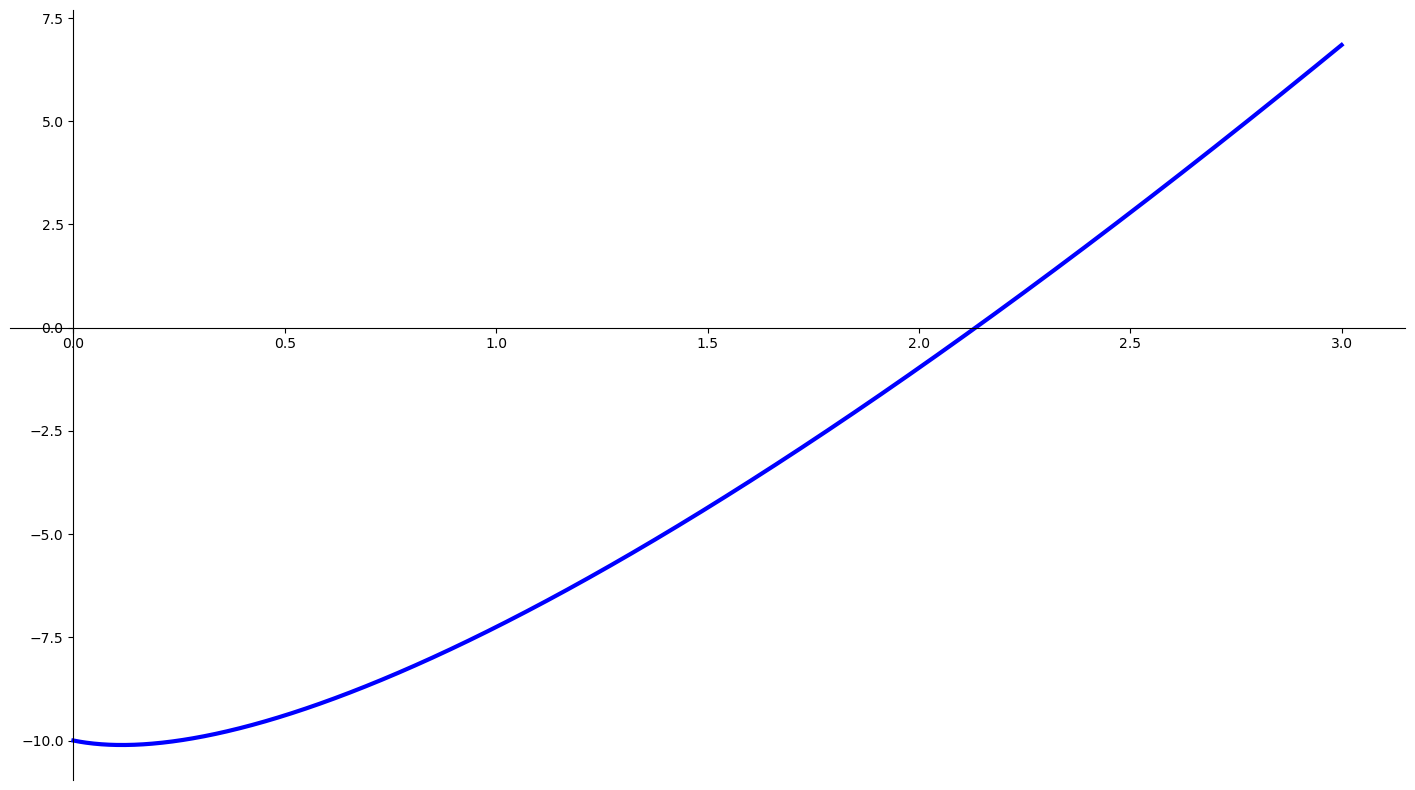

In [43]:
x_set = np.linspace(0, 3, 1000)

graph, ax = plt.subplots(1, 1, figsize  = (18, 10))
ax.plot(x_set, vec_func(x_set), 'b', linewidth=3)

ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.show()

##### Обремо довільним чином вузли

In [44]:
nodes = np.array([0, .8, 1.5, 2.2, 3])

##### Визначимо апріорну похибку інтерполяції. Для цього обчислимо $n + 1 = 6$ похідну функції $f(x)$

In [45]:
func_smbl = func(x_smbl)

d6f_smbl = smp.simplify(smp.diff(func_smbl, x_smbl, 6))
d6f_smbl

(72*x + 108.0)/(x + 0.25)**6

##### Побудуємо графік похідної для знаходження значення $\max\limits_{x\in[0, 3]} |f^{(n+1)}(x)|$

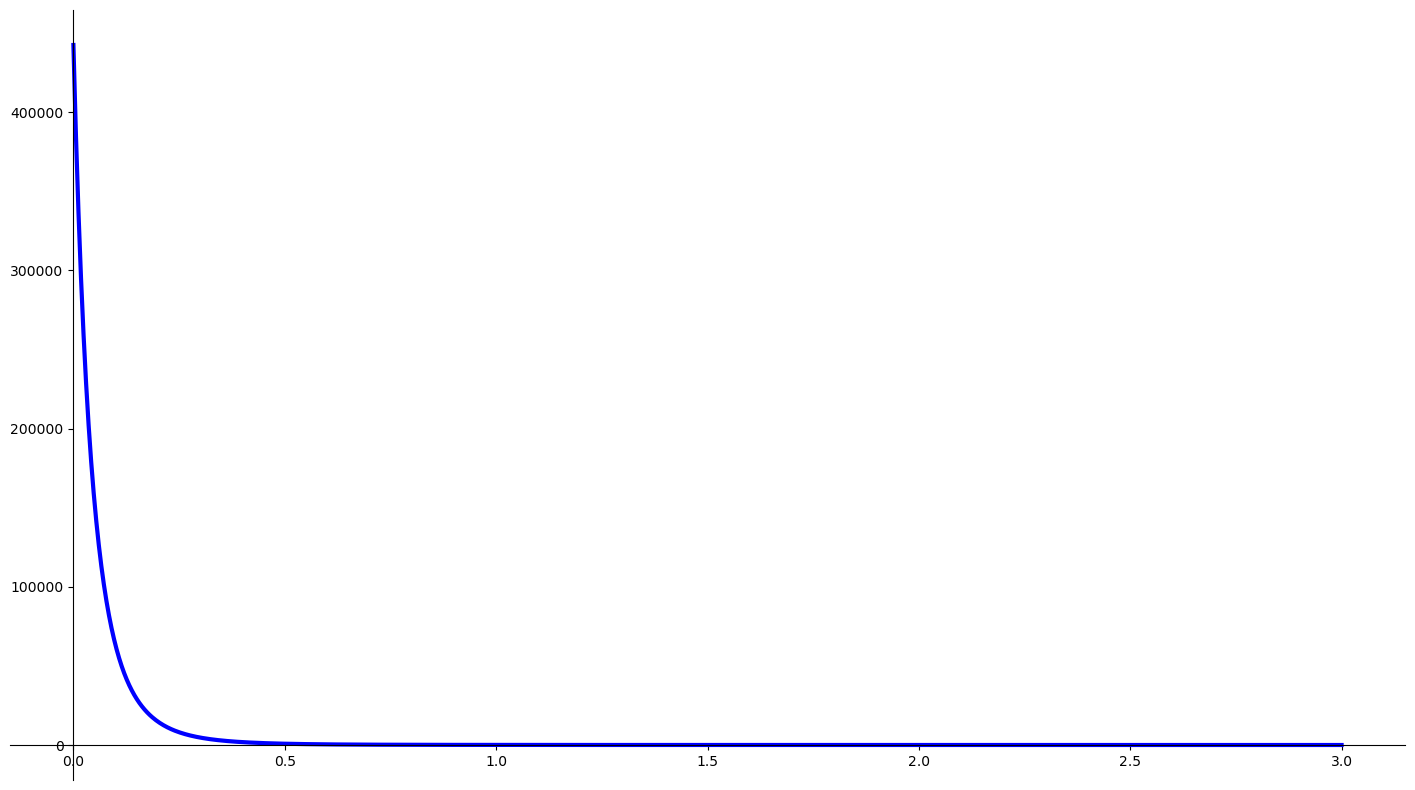

In [46]:
d6f = smp.lambdify(x_smbl, d6f_smbl)
vec_d6f = np.vectorize(d6f)
y_set = vec_d6f(x_set)

graph, ax = plt.subplots(1, 1, figsize  = (18, 10))
ax.plot(x_set, y_set, 'b', linewidth=3)

ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.show()

##### Максимум відхилення досягається в точці $x = 0$ і дорівнює

In [47]:
d6f_max = np.max(np.abs(y_set))
d6f_max

442368.0

##### Знайдемо максимум абсолютної величини відхилення функції $w(x)$

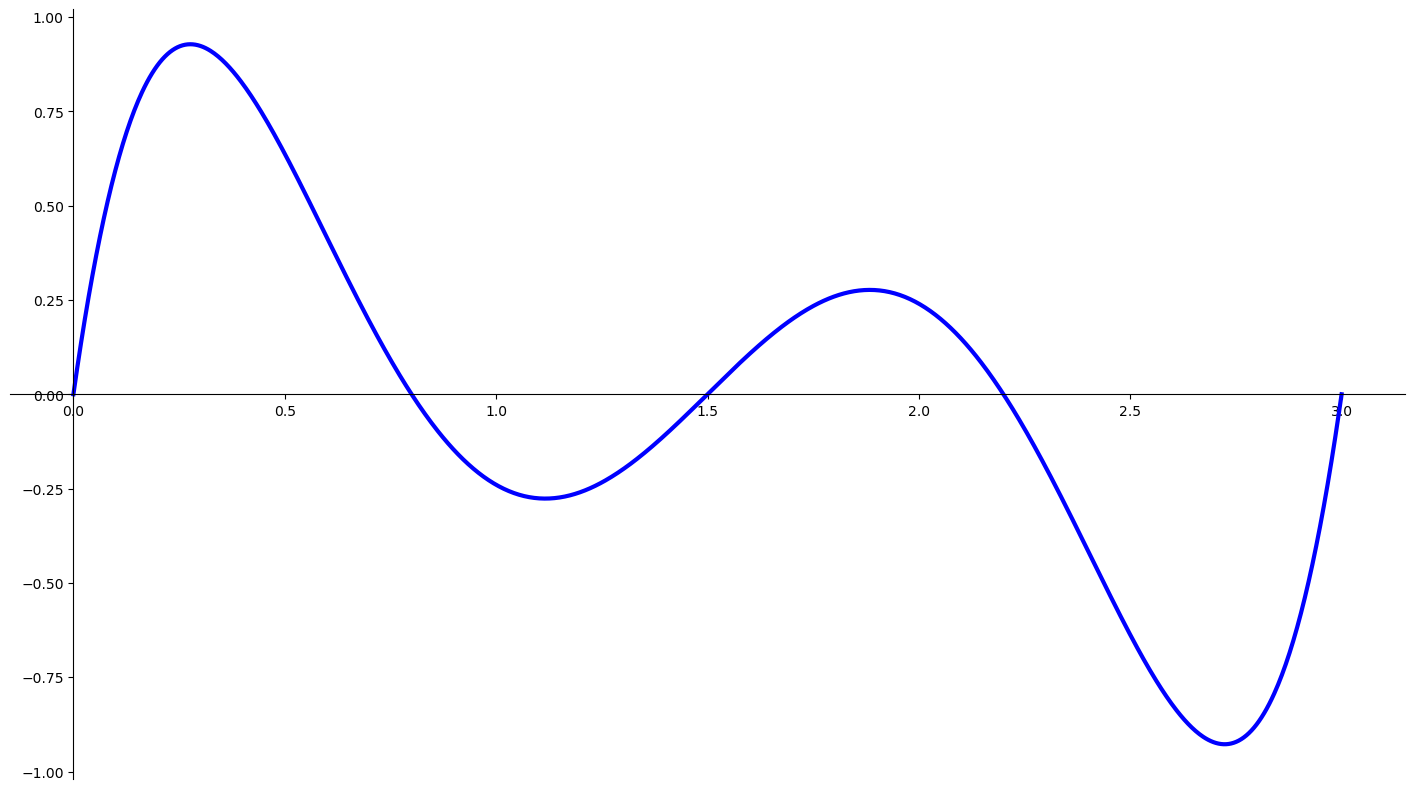

In [48]:
def om(x):
    return np.prod(x - nodes)

vec_om = np.vectorize(om)
y_set = vec_om(x_set)

graph, ax = plt.subplots(1, 1, figsize  = (18, 10))
ax.plot(x_set, y_set, 'b', linewidth=3)

ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.show()

##### Визначимо максимум модуля цієї функції

In [49]:
om_max = np.max(np.abs(y_set))
om_max

0.9277585702547528

##### Таким чином, апріорна похибка інтерполяції на обраній сутці складає

In [50]:
r_apri = d6f_max * om_max / math.factorial(6)
r_apri

570.0148655645202

##### Одержали доволі грубу оцінку.
##### Виконаємо інтерполяцію отриманих за відомою функцією сіткових значень з використанням другого багаточлена Ньютона.

In [51]:
pnts2 = np.array([nodes, vec_func(nodes)])

pol2 = newton_polynomial(pnts2, type=2)
pol2

0.126728654809004*x**4 - 1.10401380524698*x**3 + 4.21016422718204*x**2 - 0.500635583461644*x - 10.0

##### Побудуємо графік

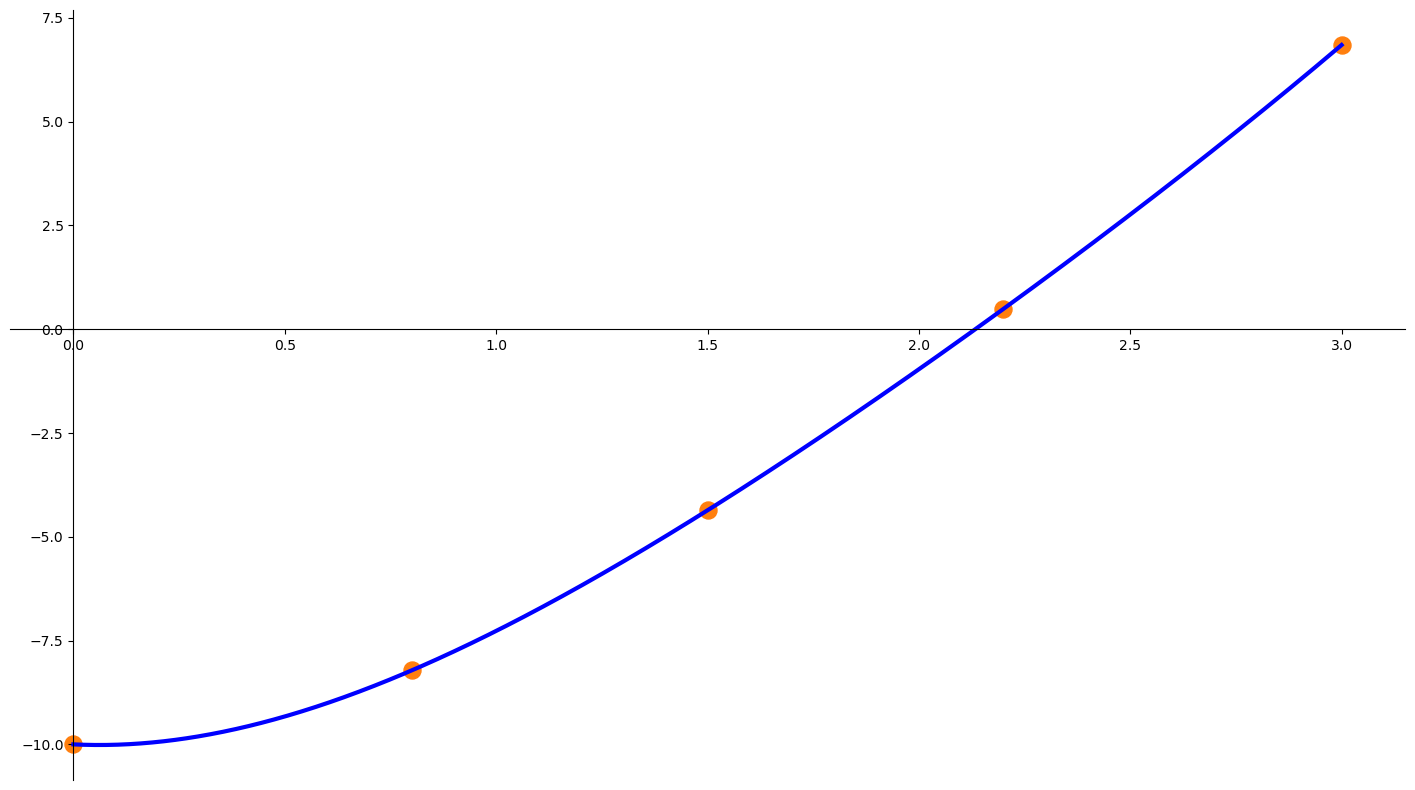

In [52]:
phi2 = np.vectorize(smp.lambdify(x_smbl, pol2))

graph, ax = plt.subplots(1, 1, figsize  = (18, 10))

ax.plot(x_set, phi2(x_set), 'b', linewidth=3)
ax.scatter(pnts2[0], pnts2[1], s = 150, c='C1')

ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.show()

##### Знайдемо похибку інтерполяції та побудуємо її графік

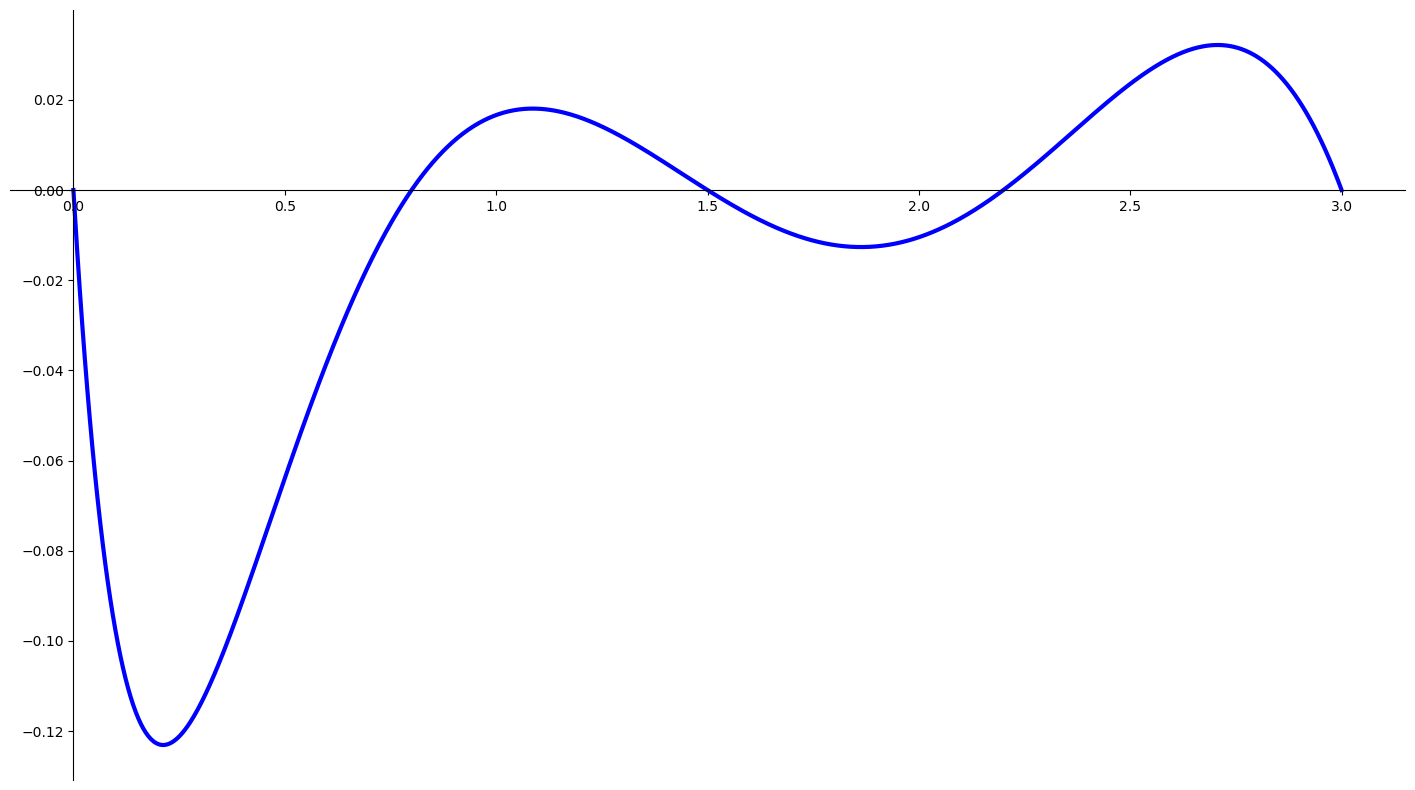

In [53]:
r_apost = smp.lambdify(x_smbl, func_smbl - pol2)
r_apost_vec = np.vectorize(r_apost)
y_set = r_apost_vec(x_set)

graph, ax = plt.subplots(1, 1, figsize  = (18, 10))

ax.plot(x_set, y_set, 'b', linewidth=3)

ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.show()

##### Максимальне значення апостеріорної оцінки не перевищує апріорну

In [54]:
r_apost_max = np.max(np.abs(y_set))
r_apost_max

0.12309417258887267

## Сплайн-інтерполяція

##### Нехай, маємо $n$ вузлів. Складемо і розв'яжемо систему рівнянь відносно коефіцієнтів багаточленів: $$ S_i(x) := a_i + b_i(x - x_{i}) + c_i(x - x_{i})^2 + d_i(x - x_{i})^3\\i = 0, ..., n-1 $$

$$ 
\begin{cases}
    S_i(x_i) = y_i, i = 0, ..., n-1\\
    S_i(x_{i+1}) = y_{i+1}, i = 0, ..., n-1\\
    S_i'(x_{i+1}) = S_{i+1}'(x_{i+1}), i = 0, ..., n-2\\
    S_i''(x_{i+1}) = S_{i+1}''(x_{i+1}), i = 0, ..., n-2\\
\end{cases}
$$

##### Отримали 4n - 2 рівняння. Оскільки про поведінку функції на кінцях інтервалу немає інформації, додамо у систему наступні рівняння:
$$ 
\begin{cases}
    S_0''(x_0) = 0\\
    S_{n-1}''(x_n) = 0\\
\end{cases}
$$

##### Позначимо відстані між сусідніми вузлами як 
$$h_i := x_{i+1} - x_{i}, i = 0, ..., n - 1$$

##### Тоді, скориставшись виведенням що було на лекції, переходимо до системи рівнянь:
$$ 
\begin{cases}
    a_i = y_i, i = 0, ..., n-1\\
    \\
    b_i = \frac{y_{i+1} - y_i}{h_i} - \frac{1}{3}h_i(c_{i+1} + 2c_i), i = 0, ..., n-2\\
    b_{n-1} = \frac{y_n - y_{n-1}}{h_{n-1}} - \frac{1}{3}2c_{n-1}h_{n-1}\\
    \\
    d_i = \frac{c_{i+1} - 2c_{i}}{6h_i}, i = 0, ..., n-2\\
    d_{n-1} = -\frac{c_{n-1}}{3h_{n-1}}\\
    \\
    c_0 = 0\\
    h_ic_i + 2(h_i + h_{i+1})c_{i+1} + h_{i+1}c_{i+2} = 3(\frac{y_{i+2} - y_{i+1}}{h_{i+1}} - \frac{y_{i+1} - y_i}{h_i}), i = 0, ..., n-2\\
    c_n = 0
\end{cases}
$$


In [55]:
def calc_aset(pnts):
    return pnts[1][:-1]


def calc_bset(pnts, c_set):
    h_set = pnts[0][1:] - pnts[0][:-1]
    hy_set = pnts[1][1:] - pnts[1][:-1]

    b_i = hy_set[:-1]/h_set[:-1] - h_set[:-1]*(c_set[1:] + 2*c_set[:-1])/3
    b_n_1 = hy_set[-1]/h_set[-1] - 2/3*c_set[-1]*h_set[-1]

    return np.append(b_i, b_n_1)


def calc_dset(pnts, c_set):
    h_set = pnts[0][1:] - pnts[0][:-1]

    d_i = (c_set[1:] - c_set[:-1]) / (3*h_set[:-1])
    d_n_1 = -c_set[-1] / (3*h_set[-1])

    return np.append(d_i, d_n_1)

In [56]:
def calc_cset(pnts):
    h_set = pnts[0][1:] - pnts[0][:-1]
    hy_set = pnts[1][1:] - pnts[1][:-1]

    A, b = create_cset_matrices(h_set, hy_set)
    c = np.linalg.solve(A, b)
    return c[:-1]


# A*c[1:] = b
def create_cset_matrices(h_set, hy_set):
    b = 3*(hy_set[1:]/h_set[1:] - hy_set[:-1]/h_set[:-1])

    A = np.zeros((b.size, b.size + 2))
    for ii in range(b.size):
        temp = np.array([h_set[ii], 2*(h_set[ii+1] + h_set[ii]), h_set[ii+1]])
        A[ii, (ii, ii+1, ii+2)] = temp

    # c_0 = 0, c_{n+1} = 0
    b = np.hstack((0, b, 0))
    A = np.vstack((np.zeros(b.size), A, np.zeros(b.size)))
    A[(0, -1), (0, -1)] = 1

    return A, b

In [57]:
def spline_interpolation(pnts):
    a_set = calc_aset(pnts)
    c_set = calc_cset(pnts)
    b_set = calc_bset(pnts, c_set)
    d_set = calc_dset(pnts, c_set)

    def pol(x):
        ii = pnts[0][:-1].searchsorted(x, 'right') - 1
        h = x - pnts[0][ii]
        return a_set[ii] + b_set[ii]*h + c_set[ii]*h**2 + d_set[ii]*h**3
    
    return np.vectorize(pol)


##### Виконаємо сплайн-інтерполяцію за даними з п.1 ($2n+1$ точка)

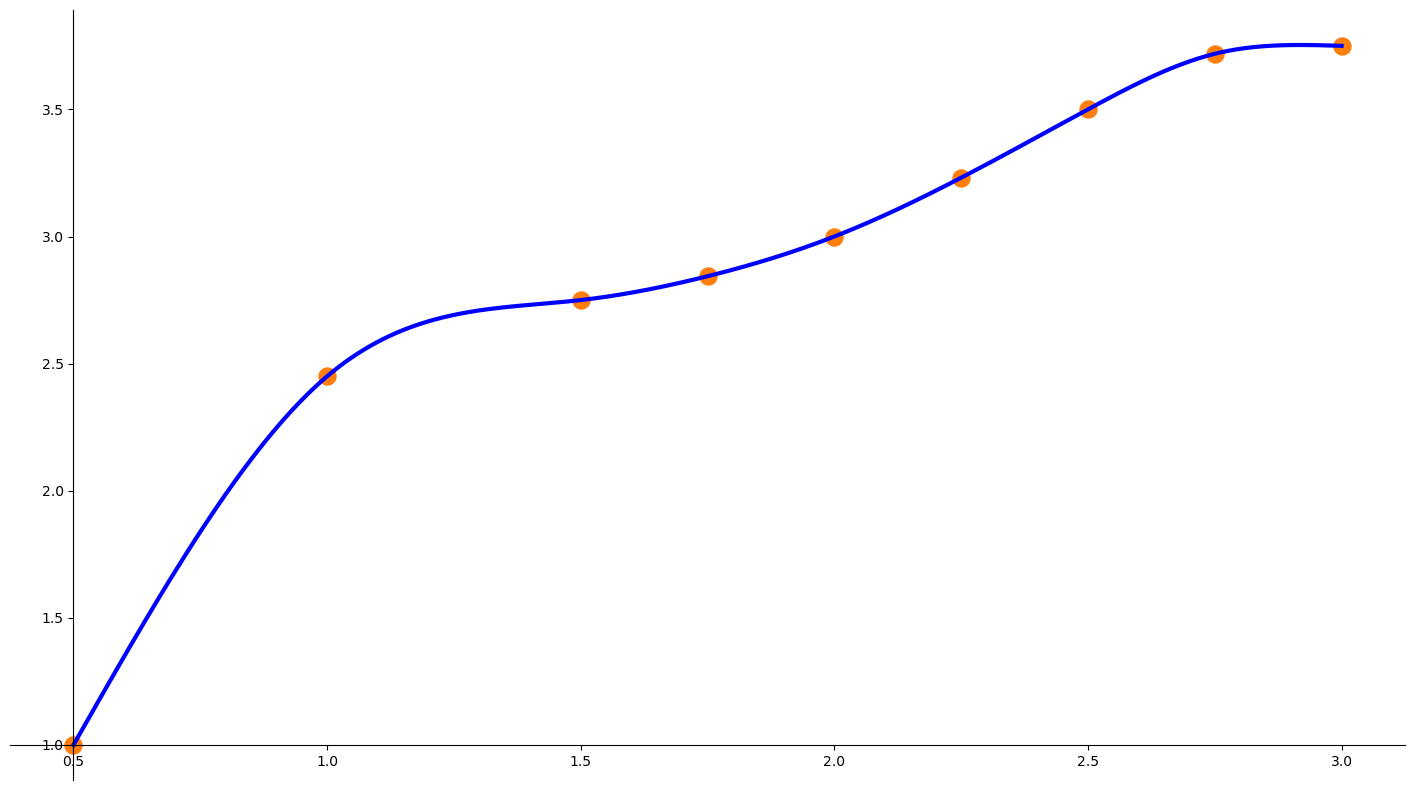

In [58]:
phi_spline = spline_interpolation(pnts1_new)

x_set = np.linspace(pnts1[0, 0], pnts1[0, -1], 1000)

graph, ax = plt.subplots(1, 1, figsize  = (18, 10))

ax.plot(x_set, phi_spline(x_set), 'b', linewidth=3)
ax.scatter(pnts1_new[0], pnts1_new[1], s = 150, c='C1')

ax.spines['left'].set_position(('data', .5))
ax.spines['bottom'].set_position(('data', 1))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.show()

##### Порівняємо із багаточленом отриманим у п.1 $pol(x)$

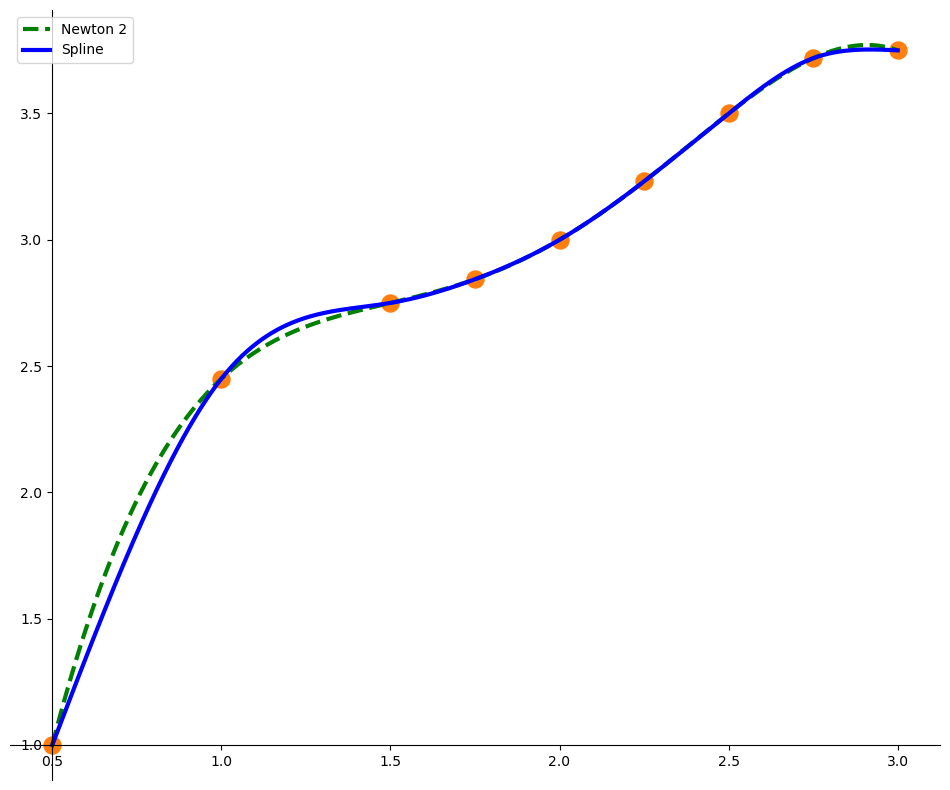

In [59]:
graph, ax = plt.subplots(1, 1, figsize  = (12, 10))

ax.plot(x_set, phi1_new(x_set), 'g', linewidth=3, ls="--")
ax.plot(x_set, phi_spline(x_set), 'b', linewidth=3)
ax.scatter(pnts1_new[0], pnts1_new[1], s = 150, c='C1')

ax.spines['left'].set_position(('data', .5))
ax.spines['bottom'].set_position(('data', 1))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.legend(['Newton 2', 'Spline'])

plt.show()

##### Побудуємо функцію розбіжностей $r(x) = pol(x) - S(x)$

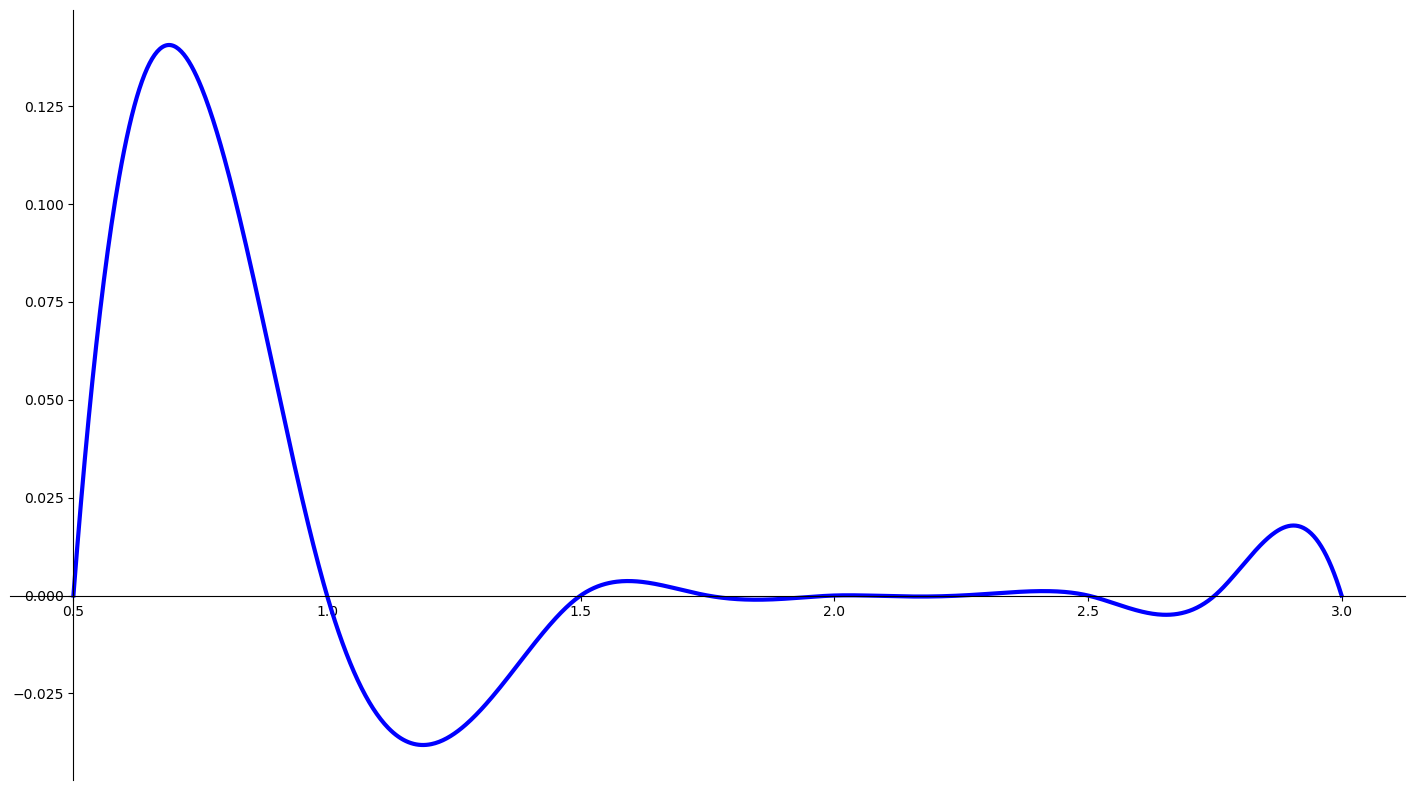

In [60]:
graph, ax = plt.subplots(1, 1, figsize  = (18, 10))

ax.plot(x_set, phi1_new(x_set) - phi_spline(x_set), 'b', linewidth=3)

ax.spines['left'].set_position(('data', .5))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.show()

##### Спостерігаємо незначні розбіжності, особливо на найдовшому інтервалі.

 ## Метод найменших квадратів

 ##### Проблему пошуку многочлена степеня $m$ як наближення до функції $f(x)$ за заданими значеннями $f(x_i), i = 1, ..., n$ методом найменших квадратів можна звести до роз'язання СЛАР:

 $$ 
\begin{cases}
    c_0 + c_1s_1 + ... + c_ms_m = b_0\\
    c_0s_1 + c_1s_2 + ... + c_ms_{m+1} = b_1\\
    ...\\
    c_0s_m + c_1s_{m+1} + ... + c_ms_{2m} = b_m\\
\end{cases}
\\ де\\
s_k = \frac{1}{n}\sum_{i = 1}^n x_i^k\\
b_k = \frac{1}{n}\sum_{i = 1}^n x_i^k y_i
$$


In [61]:
def least_squares(pnts, degree):
    A, b = least_squares_get_matrices(pnts, degree)
    c = np.linalg.solve(A, b)

    def pol(x):
        x_pow = np.array([x**k for k in range(degree + 1)])
        return np.sum(c * x_pow)

    return np.vectorize(pol)


def least_squares_get_matrices(pnts, degree):
    m = degree + 1
    b = np.array([np.mean(pnts[0]**k * pnts[1]) for k in range(m)])

    A = np.zeros((m, m))
    for ii in range(m):
        A[ii] = np.array([np.mean(pnts[0]**k) for k in range(ii, ii+m)])

    return A, b

##### Проведемо наближення за даними з п.1 (2n+1 точка). Побудуємо многочлени 1 $-$ 4 ступенів.

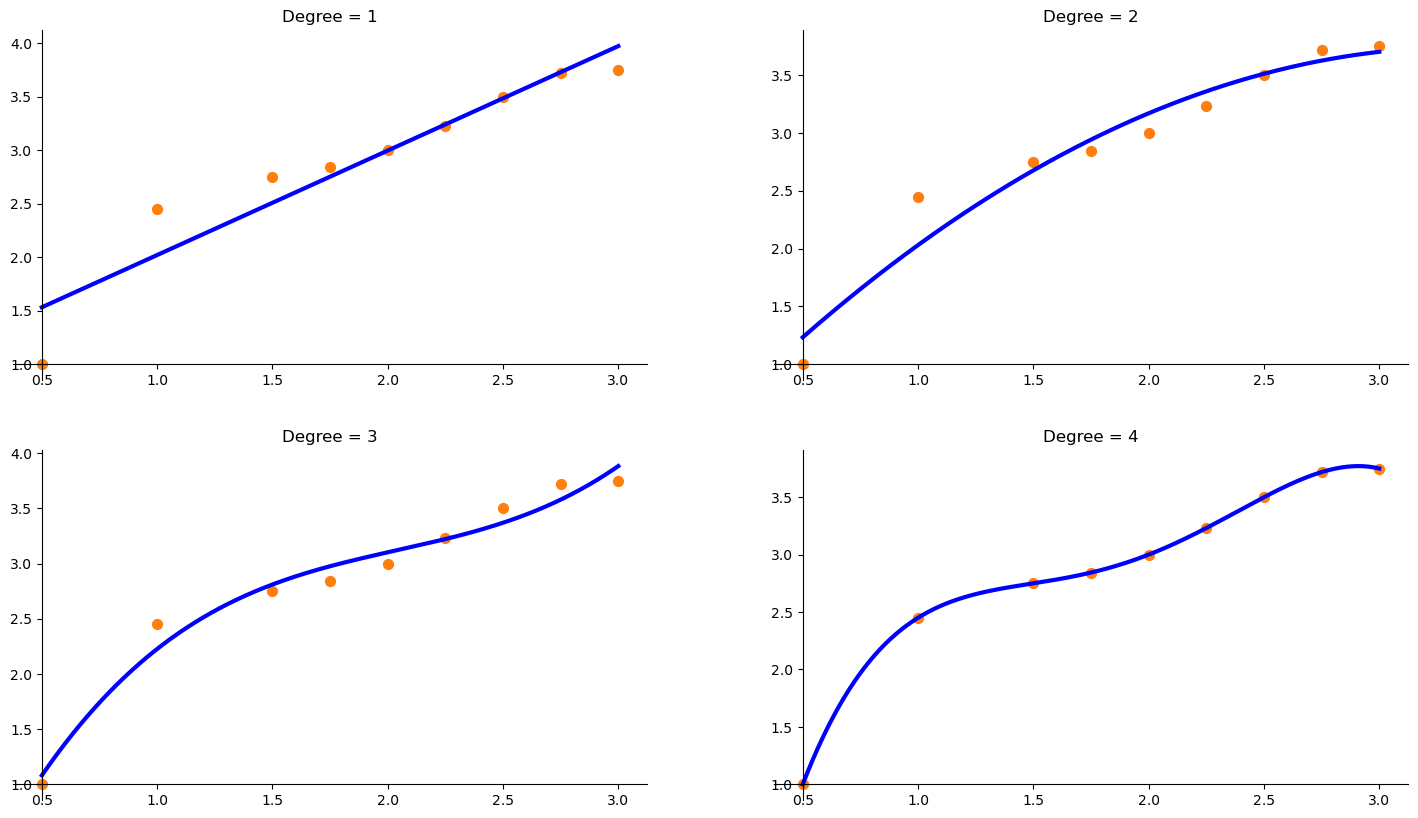

In [62]:
phi_lsm = [least_squares(pnts1_new, m + 1) for m in range(4)]

x_set = np.linspace(pnts1[0, 0], pnts1[0, -1], 1000)

graph, axs = plt.subplots(2, 2, figsize  = (18, 10))
axs = axs.flatten()

for ii in range(4):
    axs[ii].plot(x_set, phi_lsm[ii](x_set), 'b', linewidth=3)

    axs[ii].set_title(f'Degree = {ii + 1}')
    axs[ii].scatter(pnts1_new[0], pnts1_new[1], s = 50, c='C1')

    axs[ii].spines['left'].set_position(('data', .5))
    axs[ii].spines['bottom'].set_position(('data', 1))
    axs[ii].spines['right'].set_color('none')
    axs[ii].spines['top'].set_color('none')

plt.show()

##### Можна побачити, що многочлен 4 степеня є розв'язком завдання інтерполяції. Воно й не дивно, другий інтерполяційний багаточлен Ньютона, побудованний за 9 точками в п.1, також був 4 степіня.

## Висновки
##### Під час виконання роботи я придбав практичні навички в побудові наближених формул інтерполювання для одновимірних функцій, заданих на відрізку у вигляді таблиці. Визначенні похибок інтерполяційних формул. Інтерполяції за допоогою сплайнів. Застосуванні практичних методів наближення функцій.